In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
import matplotlib.pyplot as mp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('water_quality_.csv')
df = data.copy()

In [ ]:
"""
df_renamed = df.rename(columns=
        {'Hardness': '水質硬度', 'Solids': '溶解固體',
         'Chloramines': '氯胺', 'Sulfate': '硫酸鹽',
         'Organic_carbon': '有機碳', 'Trihalomethanes': '三鹵甲烷',
         'Turbidity': '濁度'  })
df_renamed.head()
"""

"\ndf_renamed = df.rename(columns=\n        {'Hardness': '水質硬度', 'Solids': '溶解固體',\n         'Chloramines': '氯胺', 'Sulfate': '硫酸鹽',\n         'Organic_carbon': '有機碳', 'Trihalomethanes': '三鹵甲烷',\n         'Turbidity': '濁度'  })\ndf_renamed.head()\n"

In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

ph                 491
Sulfate            781
Trihalomethanes    162
dtype: int64


In [ ]:
#median 填補
df_cleaned = df.fillna(df.median())
len(df_cleaned)

3276

In [ ]:
print(df_cleaned.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64


In [ ]:
df_cleaned[(df_cleaned['ph'] <= 3) | (df_cleaned['ph'] >= 11) ]


ph    Hardness        Solids  Chloramines     Sulfate  \
9     11.180284  227.231469  25484.508490     9.077200  404.041635   
80     1.844538  233.764343  28689.595780     7.724432  333.073546   
104    2.612036  188.804126  34798.252590     6.796439  333.073546   
128   11.180695  228.300860  16600.392750     6.094001  333.073546   
204   11.267828  161.896362   6040.369868     7.205414  333.073546   
263   13.175402   47.432000  19237.949680     8.907020  375.147315   
317   11.301794   77.459586  39227.619460     8.517986  337.501247   
354    2.798549  311.383957  26931.243480     7.116897  333.073546   
692    1.757037  147.581831  41538.242730     7.728177  376.012933   
726    0.227499  152.530111  39028.599340     3.462492  283.693782   
783   11.898078  228.132673   8296.550611     9.899637  346.649750   
810    0.989912  133.216942  16922.853900     9.293289  444.375731   
1023  11.027880  228.322798  13124.105640     7.516643  319.354039   
1162  11.244507  169.403655  43533.657850     5.888460  341.029600   
1231   2.690831  151.782906  30204.546740     6.053072  303.702409   
1303  12.246928  217.368014  11318.140560     8.465160  375.894758   
1343   2.569244  201.603284  48204.172190     6.380684  261.719960   
1353  11.534880  183.262261   4111.785432     7.416773  398.955345   
2075  14.000000  235.677458  24008.992040     5.635029  381.097711   
2096  11.568768  192.924448  39234.470180     8.860762  235.995461   
2165   2.803563  186.123924  11920.907420     8.642034  332.744519   
2189   2.558103  147.490575  21316.506730     9.142234  312.054239   
2263  11.235426  178.596496  33773.107060     9.063042  327.650960   
2300   2.974429  147.148675  17326.202250     2.498597  393.168745   
2343   2.538116  100.806520  19872.854850     5.014023  418.000000   
2473   2.945469  126.748100  16829.393040    10.597395  333.073546   
2478  11.069456  256.201980  43536.020870     4.047620  333.073546   
2586  11.219135  237.582673  21871.785170     3.074316  333.073546   
2646  11.907740  298.098680  17083.175090     5.878993  333.073546   
2681   2.376768  129.863973  11684.111640     9.974808  301.429747   
2868  13.541240  187.606792  13475.912770     6.756055  333.073546   
2895  13.349889  152.776455  18464.900770     6.717973  334.864070   
2899   1.431782  228.130383  12937.246890     6.214773  319.734136   
2925  11.563169  174.942862  19359.428820     6.495619  332.446490   
2928   0.975578  221.204114  31145.110740     7.615583  333.677843   
2932   2.925174  260.458041  39233.098840     7.670149  303.402079   
2945  11.496702  195.989486  14158.157280     7.235224  311.965093   
3014   0.000000  214.846144  49456.587110     7.897539  333.073546   
3017  11.496859  186.125296  12253.303390     8.066980  325.409341   
3020  11.621140  203.730368  15102.237430     7.816415  333.073546   
3078  11.390543  145.341937  16175.221940     6.613865  333.073546   
3088   2.128531  192.696422  24905.284520     7.757770  383.519892   
3094   1.985383  216.480025  23039.328510     6.769268  344.014256   
3108  11.449739  186.652648  12355.344110     7.065576  321.831513   
3269  11.491011   94.812545  37188.826020     9.263166  258.930600   

      Organic_carbon  Trihalomethanes  Turbidity  Check  
9          17.927806        71.976601   4.370562      0  
80         15.611859        54.299444   5.013463      0  
104        13.170763        49.523770   4.765205      0  
128        15.035047       110.739299   3.809842      0  
204        11.768309        25.525267   4.153347      0  
263        12.083896        66.622485   4.106924      1  
317        14.326889        53.121260   3.309580      1  
354        14.235154        42.080353   3.663252      1  
692        10.828696        65.005840   2.967554      1  
726        13.201943        62.322711   3.545741      1  
783        15.486862        63.529460   3.024968      1  
810        10.430076        43.578466   5.160604      1  
1023        8.033859        48.529038 

In [ ]:
df = df_cleaned.drop(df_cleaned[(df_cleaned['ph'] <= 3) | (df_cleaned['ph'] >= 11) ].index)
len(df)

3231

##圖


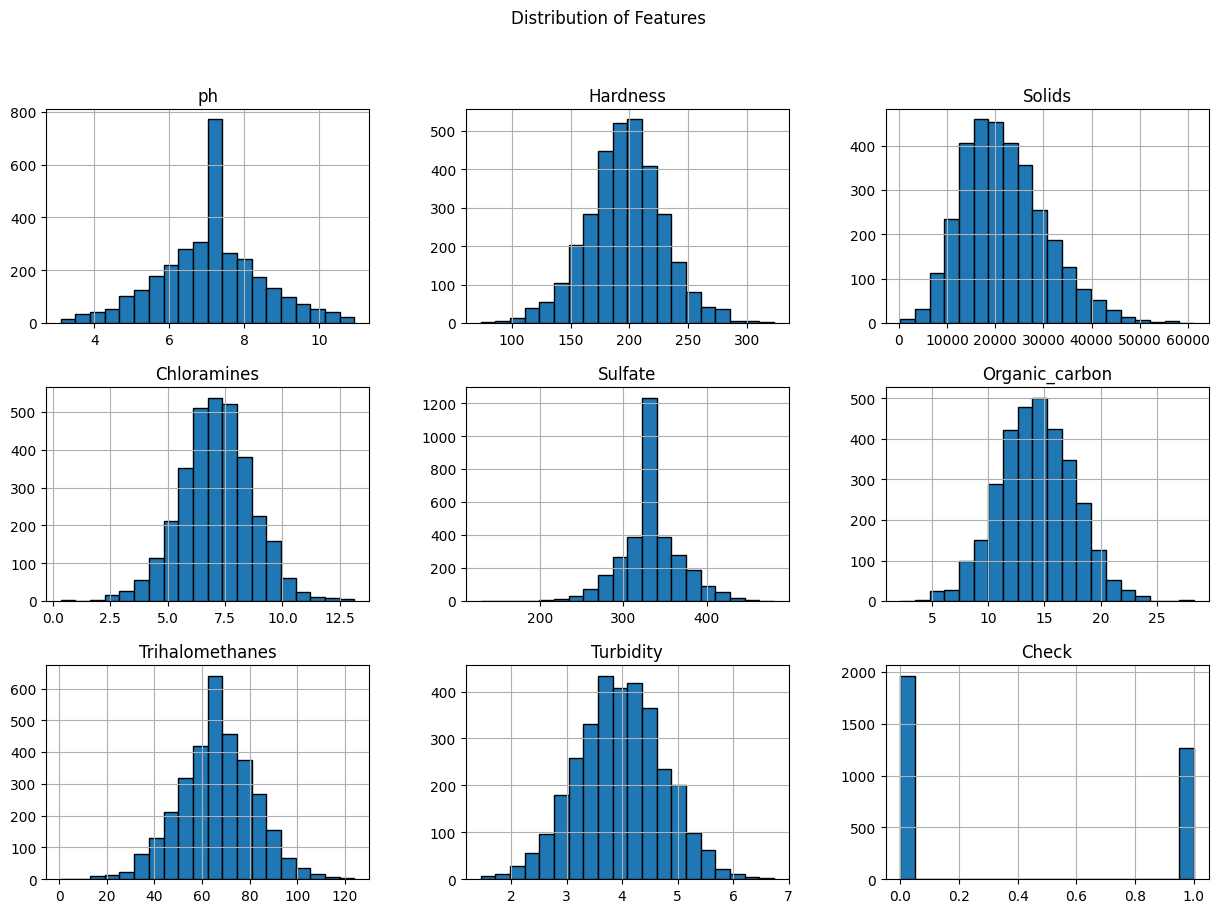

In [ ]:
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distribution of Features")
plt.show()

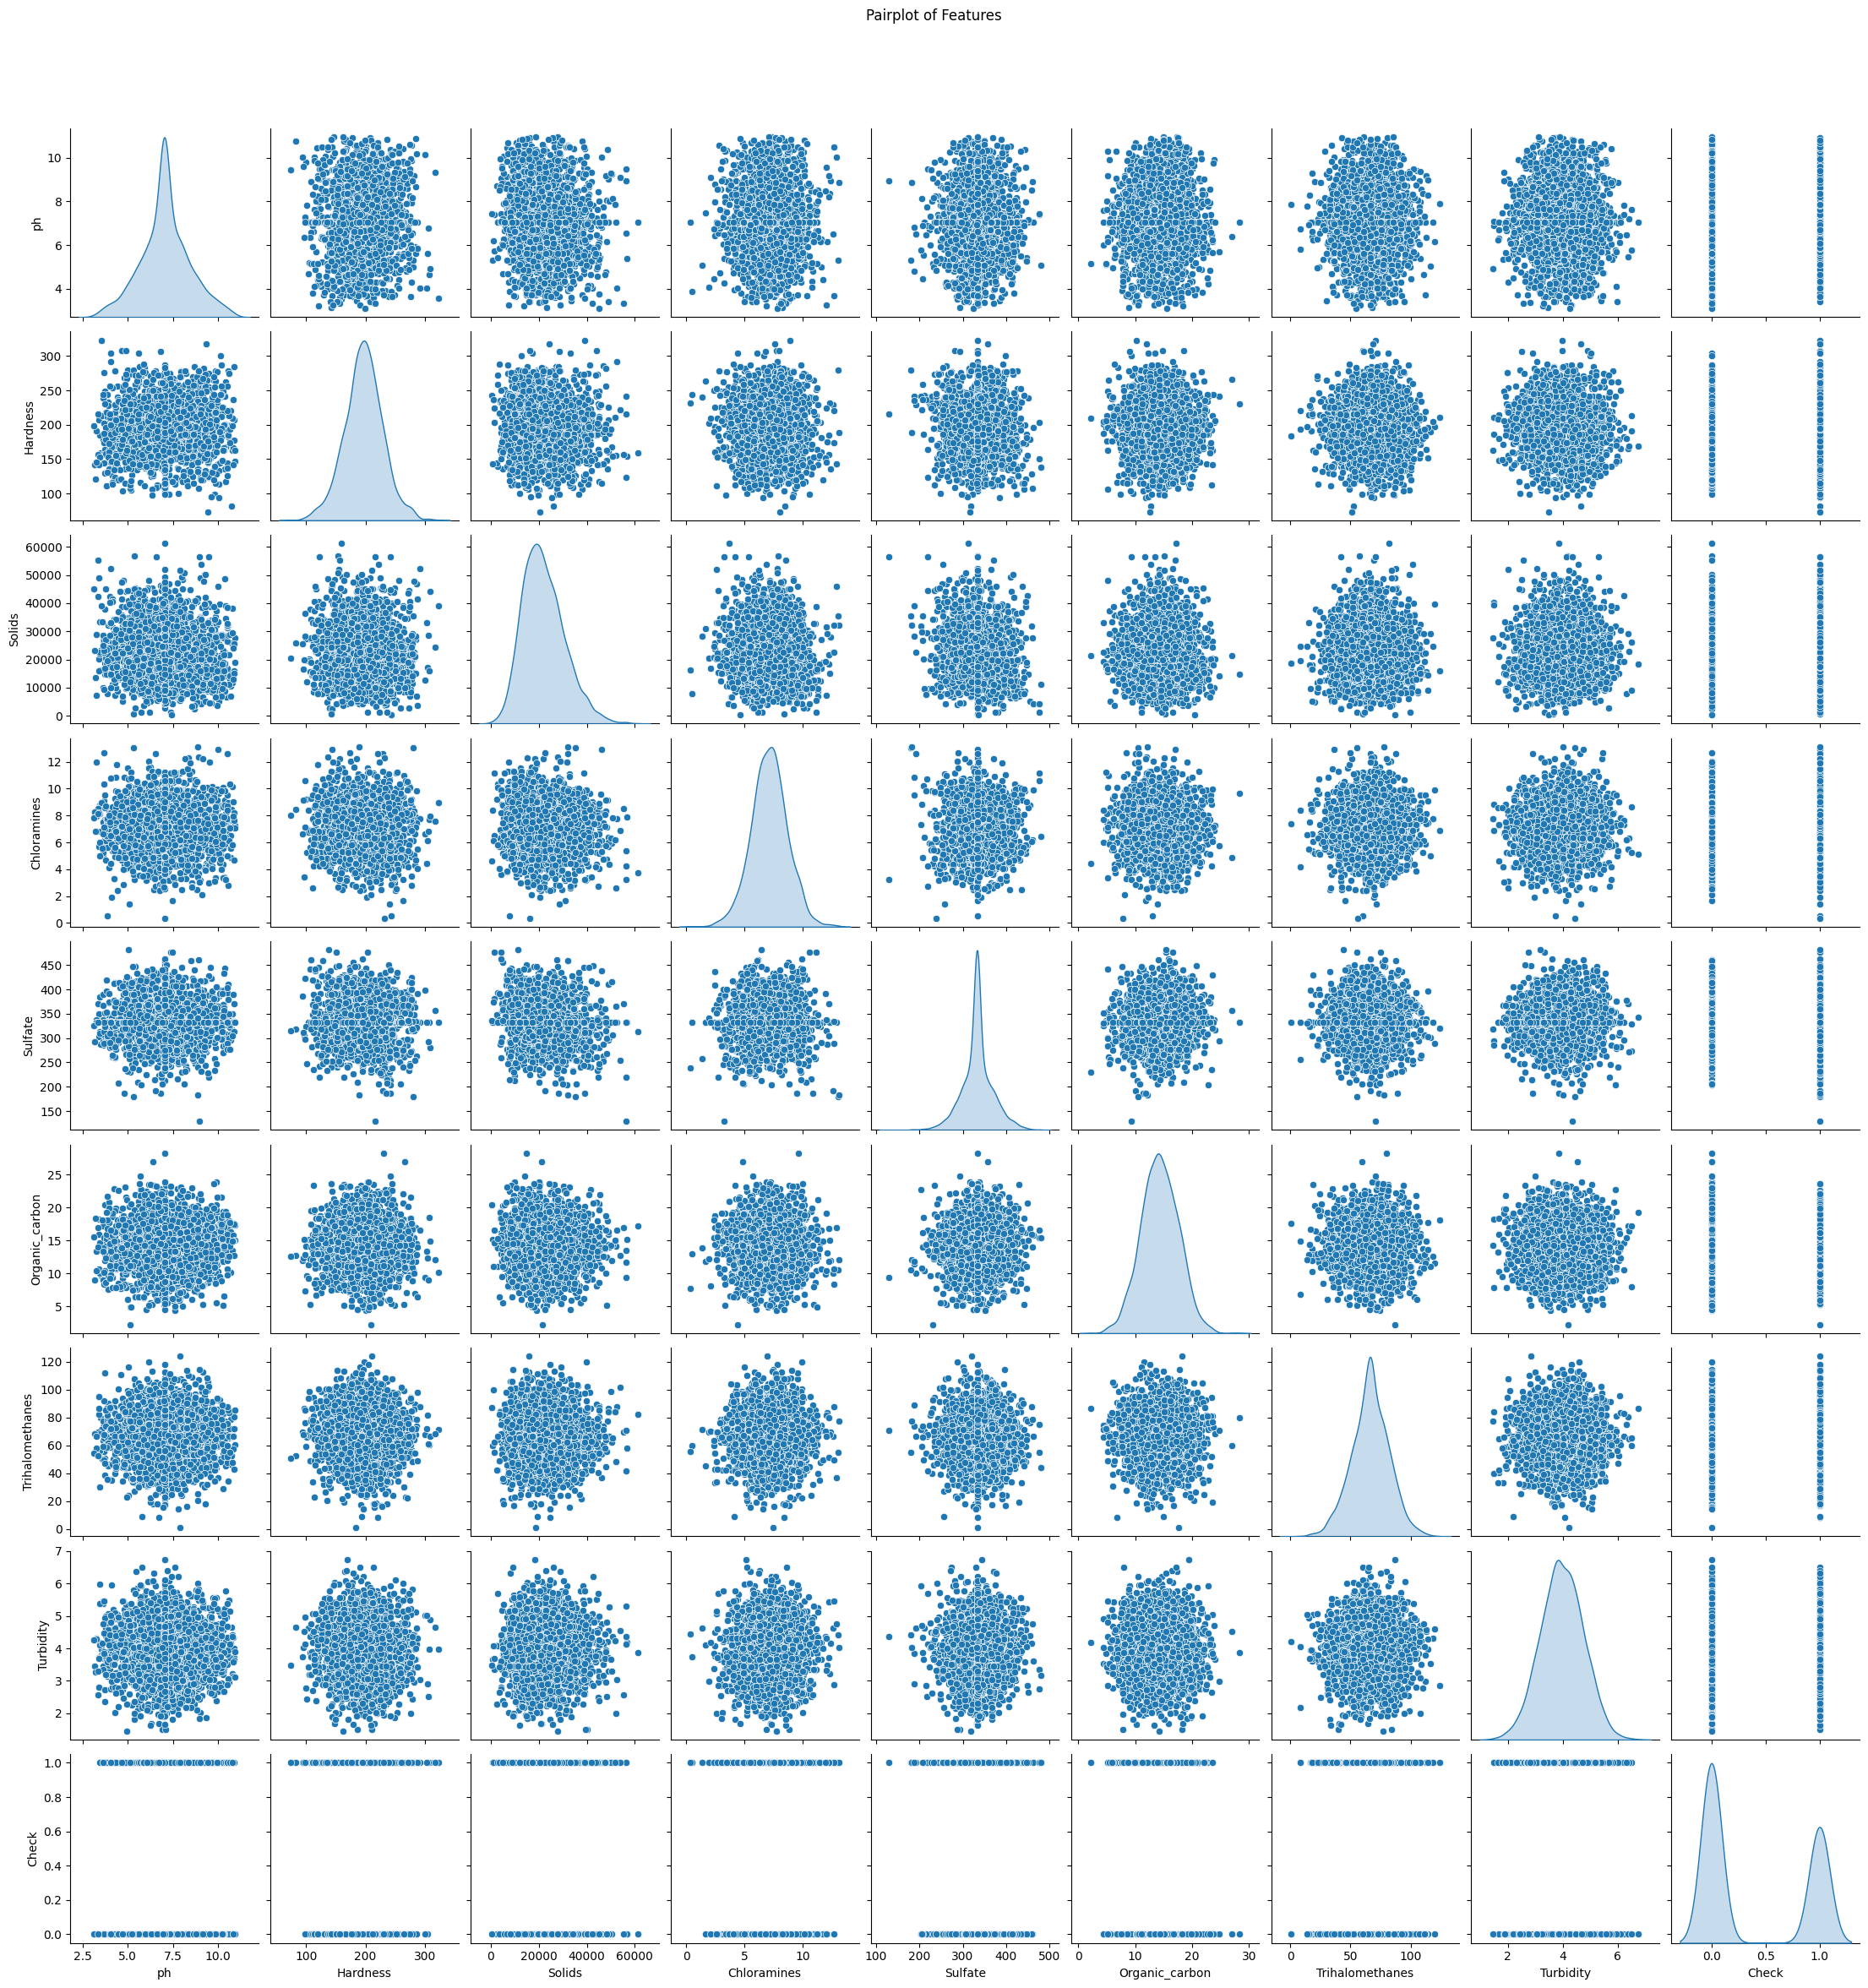

In [ ]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.05)
plt.show()

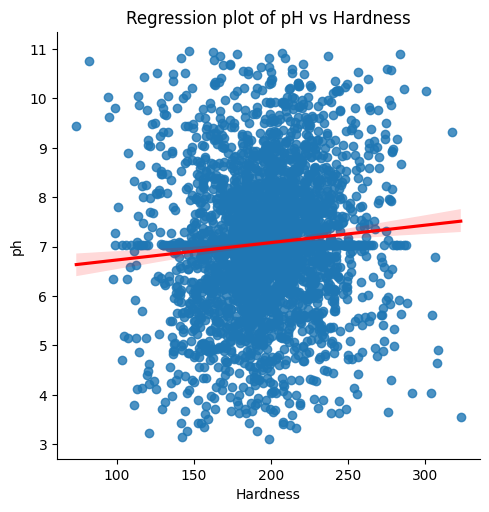

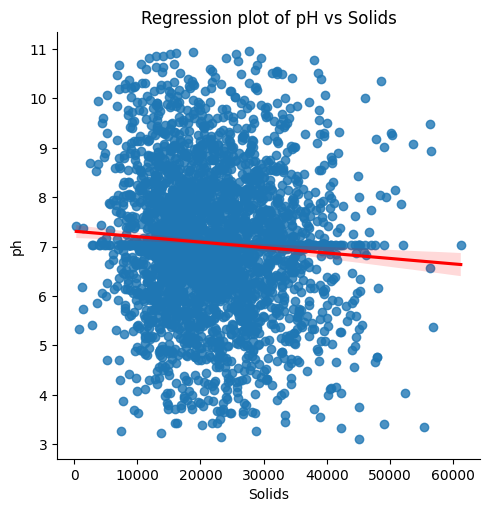

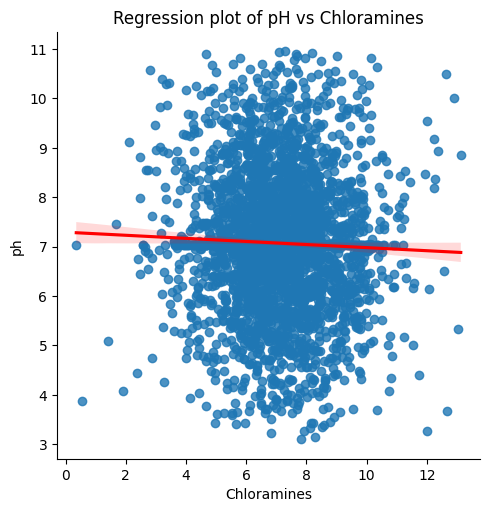

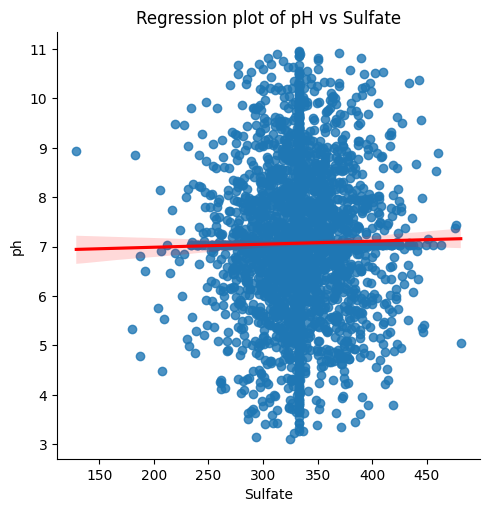

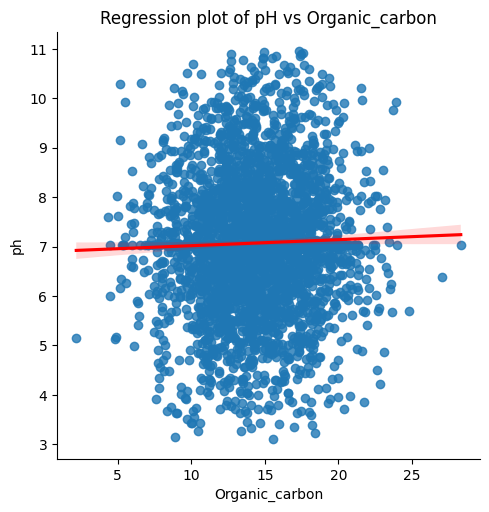

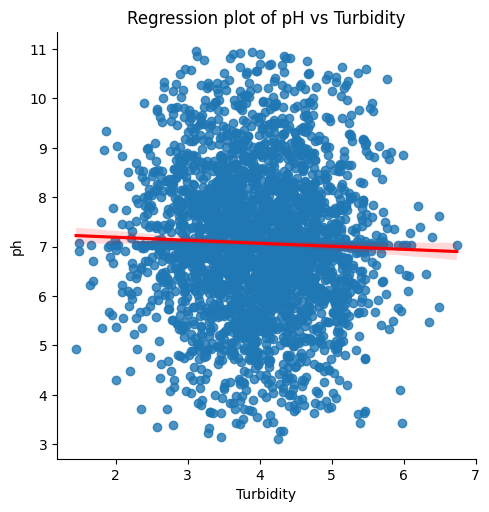

In [ ]:
# 針對 ph 進行回歸分析
for col in df.columns:
    if col != 'ph':
        sns.lmplot(x=col, y='ph', data=df, line_kws={'color': 'red'})
        plt.title(f"Regression plot of pH vs {col}")
        plt.show()

In [ ]:


# 標準化數據
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 執行 PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# 繪製 PCA 結果
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Dataset")
plt.show()

In [ ]:


# 設定群集數
kmeans = KMeans(n_clusters=3, random_state=42)


# 繪製群集結果
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['Cluster'], palette="Set1", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering with PCA")
plt.legend()
plt.show()


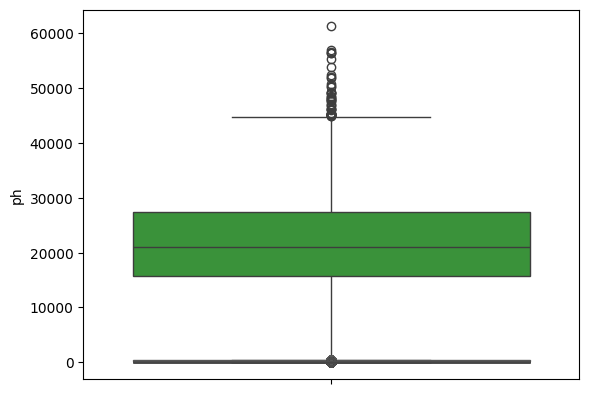

In [ ]:
for column in df.select_dtypes(include=np.number).columns:
  sns.boxplot(df[column])
plt.show()

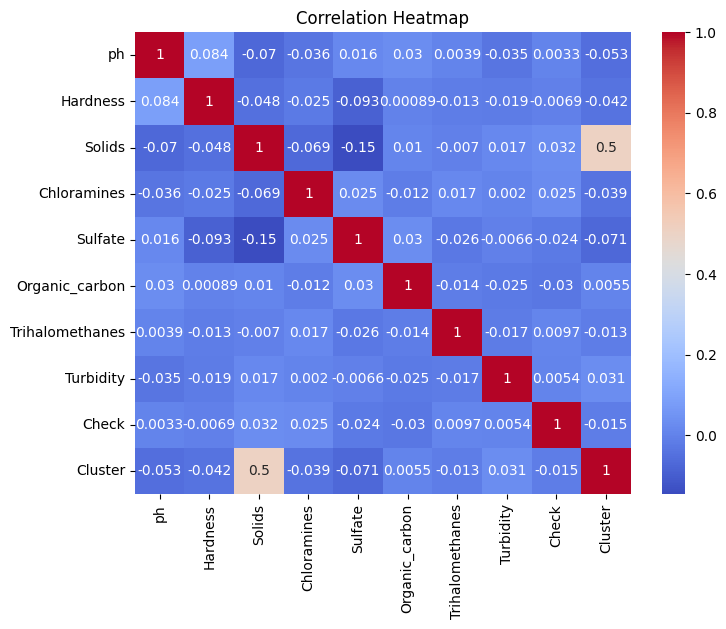

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#model

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from scipy import stats
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = df.copy()
X.drop('Check', axis= 1, inplace = True)
y = df['Check']

print(X.shape)
print(y.shape)

(3231, 8)
(3231,)


In [ ]:
#feature_importance
point_biserial_coefs = []

for i in range(X.shape[1]):
    coef = stats.pointbiserialr(X.iloc[:,i], y)[0]
    point_biserial_coefs.append(coef)


mutual_inf = mutual_info_classif(X,y)


feature_importance = pd.DataFrame({'Mutual Inf':mutual_inf, 'Point-BiSerial':point_biserial_coefs}, index = X.columns )
feature_importance.sort_values(by = 'Point-BiSerial', ascending = False)

Mutual Inf  Point-BiSerial
Solids             0.001362        0.031816
Chloramines        0.000000        0.025285
Trihalomethanes    0.000000        0.009707
Turbidity          0.004434        0.005377
ph                 0.003546        0.003309
Hardness           0.025141       -0.006877
Sulfate            0.006102       -0.023862
Organic_carbon     0.000303       -0.030242

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size = 0.2, shuffle = True, random_state = 2024)
print('train samples ->', X_train.shape[0])
print('test samples ->', X_test.shape[0])

train samples -> 2584
test samples -> 647


In [ ]:
#測試交互項

X_train['Solids*s'] = X_train['Solids'] * X_train['Sulfate']
X_test['Solids*s'] = X_test['Solids'] * X_test['Sulfate']

X_train['s*hard'] = X_train['Sulfate'] * X_train['Hardness']
X_test['s*hard'] = X_test['Sulfate'] * X_test['Hardness']


X_train['ph*hard'] = X_train['ph'] * X_train['Hardness']
X_test['ph*hard'] = X_test['ph'] * X_test['Hardness']

#原始的MODEL

In [ ]:

random_seed = 42

# DecisionTreeRegressor
model_DecisionTree0 = DecisionTreeRegressor(random_state=random_seed)
model_DecisionTree0.fit(X_train, y_train)
predictions_DecisionTree0 = model_DecisionTree0.predict(X_test)
print("DecisionTreeRegressor Accuracy:", accuracy_score(y_test, predictions_DecisionTree0.round()))

# ExtraTreeRegressor
model_ExtraTree0 = ExtraTreeRegressor(random_state=random_seed)
model_ExtraTree0.fit(X_train, y_train)
predictions_ExtraTree0 = model_ExtraTree0.predict(X_test)
print("ExtraTreeRegressor Accuracy:", accuracy_score(y_test, predictions_ExtraTree0.round()))


# RandomForestRegressor
model_RandomForest0 = RandomForestRegressor(random_state=random_seed)
model_RandomForest0.fit(X_train, y_train)
predictions_RandomForest0 = model_RandomForest0.predict(X_test)
print("RandomForestRegressor Accuracy:", accuracy_score(y_test, predictions_RandomForest0.round()))

# KNeighborsClassifier
model_KN0 = KNeighborsClassifier()
model_KN0.fit(X_train, y_train)
predictions_KN0 = model_KN0.predict(X_test)
print("KNeighborsClassifier Accuracy:", accuracy_score(y_test, predictions_KN0))

DecisionTreeRegressor Accuracy: 0.5857805255023184
ExtraTreeRegressor Accuracy: 0.5965996908809892
RandomForestRegressor Accuracy: 0.6491499227202473
KNeighborsClassifier Accuracy: 0.5363214837712519


In [ ]:
# CatBoostRegressor
model_CatBoost0 = CatBoostRegressor(verbose=10, random_seed=random_seed)
model_CatBoost0.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)
predictions_CatBoost0 = model_CatBoost0.predict(X_test)
print("CatBoostRegressor Accuracy:", accuracy_score(y_test, predictions_CatBoost0.round()))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.059105
0:	learn: 0.4853038	test: 0.4906516	best: 0.4906516 (0)	total: 4.81ms	remaining: 4.81s
10:	learn: 0.4693908	test: 0.4805922	best: 0.4805922 (10)	total: 65.8ms	remaining: 5.91s
20:	learn: 0.4609152	test: 0.4763407	best: 0.4763407 (20)	total: 165ms	remaining: 7.69s
30:	learn: 0.4529050	test: 0.4726740	best: 0.4726740 (30)	total: 258ms	remaining: 8.07s
40:	learn: 0.4454138	test: 0.4694553	best: 0.4694553 (40)	total: 352ms	remaining: 8.23s
50:	learn: 0.4399128	test: 0.4680702	best: 0.4680702 (50)	total: 452ms	remaining: 8.41s
60:	learn: 0.4345526	test: 0.4668027	best: 0.4668027 (60)	total: 560ms	remaining: 8.63s
70:	learn: 0.4304793	test: 0.4663286	best: 0.4660045 (68)	total: 612ms	remaining: 8.01s
80:	learn: 0.4266166	test: 0.4654577	best: 0.4654577 (80)	total: 692ms	remaining: 7.86s
90:	learn: 0.4220450	test: 0.4643567	best: 0.4643567 (90)	total: 747ms	remaining: 7.46s
100:	learn: 0.4182206	test: 0.4638692	best: 0.4638692 (100)	total: 852ms	remaining: 7.58s


#調整model的參數

In [ ]:
model_DecisionTree = DecisionTreeRegressor(
    max_depth=8,              # 限制樹的深度
    min_samples_split=10,     # 最小分裂樣本數
    min_samples_leaf=5,       # 最小葉子樣本數
    random_state=random_seed
)
model_DecisionTree.fit(X_train, y_train)
predictions_DecisionTree = model_DecisionTree.predict(X_test)
print("DecisionTreeRegressor Accuracy:", accuracy_score(y_test, predictions_DecisionTree.round()))


DecisionTreeRegressor Accuracy: 0.6352395672333848


In [ ]:
model_ExtraTree = ExtraTreeRegressor(
    max_depth=8,              # 限制樹的深度
    min_samples_split=10,     # 最小分裂樣本數
    min_samples_leaf=5,       # 最小葉子樣本數
    random_state=random_seed
)
model_ExtraTree.fit(X_train, y_train)
predictions_ExtraTree = model_ExtraTree.predict(X_test)
print("ExtraTreeRegressor Accuracy:", accuracy_score(y_test, predictions_ExtraTree.round()))


ExtraTreeRegressor Accuracy: 0.6275115919629057


In [ ]:
model_RandomForest = RandomForestRegressor(
    n_estimators=200,         # 增加樹的數量（預設 100）
    max_depth=10,             # 限制樹的深度，避免過度擬合
    min_samples_split=10,     # 最小分裂的樣本數
    min_samples_leaf=4,       # 最小葉子節點的樣本數
    random_state=random_seed
)
model_RandomForest.fit(X_train, y_train)
predictions_RandomForest = model_RandomForest.predict(X_test)
print("RandomForestRegressor Accuracy:", accuracy_score(y_test, predictions_RandomForest.round()))


RandomForestRegressor Accuracy: 0.6352395672333848


In [ ]:
model_KN = KNeighborsClassifier(
    n_neighbors=5,    # 鄰居數量
    weights='distance',  # 使用距離加權
    p=2              # 使用 L2 距離 (Euclidean)
)
model_KN.fit(X_train, y_train)
predictions_KN = model_KN.predict(X_test)
print("KNeighborsClassifier Accuracy:", accuracy_score(y_test, predictions_KN))


KNeighborsClassifier Accuracy: 0.5440494590417311


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用標準化後的數據
model_KN.fit(X_train_scaled, y_train)
predictions_KN = model_KN.predict(X_test_scaled)
print("KNeighborsClassifier (Standardized) Accuracy:", accuracy_score(y_test, predictions_KN))


KNeighborsClassifier (Standardized) Accuracy: 0.6676970633693973


In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import accuracy_score

# 調整參數
model_CatBoost = CatBoostRegressor(
    iterations=2000,          # 增加樹的數量
    learning_rate=0.03,       # 調低學習率，提高擬合效果
    depth=8,                  # 增加樹的深度
    l2_leaf_reg=5,            # 正則化係數
    bagging_temperature=0.8,  # 適度多樣性
    random_seed=42,           # 固定隨機種子
    early_stopping_rounds=50, # 避免過度訓練
    verbose=100,              # 每 100 次顯示一次進度
    loss_function='RMSE'      # 使用 RMSE（均方根誤差）作為損失函數
)

# 訓練模型
model_CatBoost.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    plot=True
)

# 預測與評估
predictions_CatBoost = model_CatBoost.predict(X_test)
print("CatBoostRegressor Accuracy:", accuracy_score(y_test, predictions_CatBoost.round()))


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4860147	test: 0.4916840	best: 0.4916840 (0)	total: 10.1ms	remaining: 20.2s
100:	learn: 0.4241253	test: 0.4652593	best: 0.4652593 (100)	total: 1.12s	remaining: 21.1s
200:	learn: 0.3916460	test: 0.4625920	best: 0.4623740 (182)	total: 2.44s	remaining: 21.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.4623740181
bestIteration = 182

Shrink model to first 183 iterations.
CatBoostRegressor Accuracy: 0.6568778979907264


#Feature Importance

##Ran

In [ ]:

X['Solids*s'] = X['Solids'] * X['Sulfate']
X['s*hard'] = X['Sulfate'] * X['Hardness']
X['ph*hard'] = X['ph'] * X['Hardness']

# Now perform the train-test split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024)

# RandomForest特徵重要性
importances_RandomForest0 = model_RandomForest0.feature_importances_

# Now plot the feature importances
plt.barh(X_train.columns, importances_RandomForest0)
plt.xlabel('RandomForest Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Now perform the train-test split again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=2024)

# RandomForest特徵重要性
importances_RandomForest = model_RandomForest.feature_importances_

# Now plot the feature importances
plt.barh(X_train.columns, importances_RandomForest)
plt.xlabel('RandomForest Feature Importance')
plt.ylabel('Features')
plt.show()

##DecisionTree

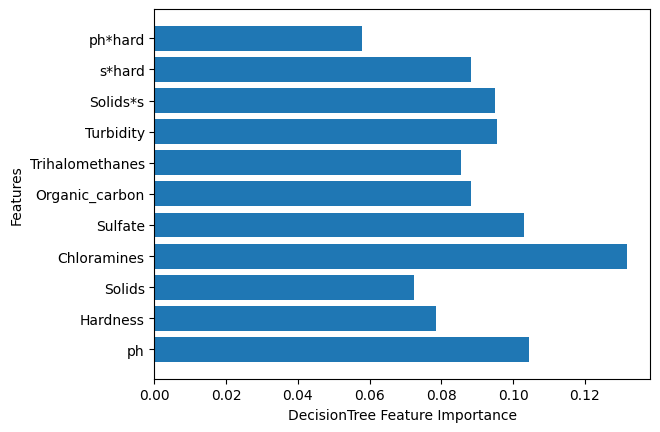

In [ ]:
#DecisionTree特徵重要性
importances_DecisionTree0 = model_DecisionTree0.feature_importances_

plt.barh(X_train.columns, importances_DecisionTree0)
plt.xlabel('DecisionTree Feature Importance')
plt.ylabel('Features')
plt.show()

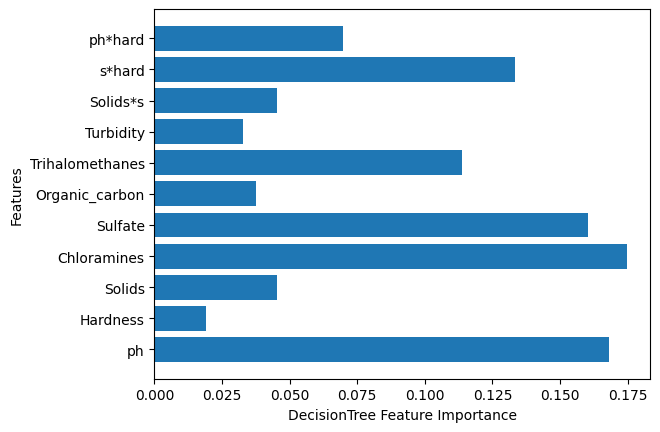

In [ ]:
importances_DecisionTree = model_DecisionTree.feature_importances_

plt.barh(X_train.columns, importances_DecisionTree)
plt.xlabel('DecisionTree Feature Importance')
plt.ylabel('Features')
plt.show()

##ExtraTree

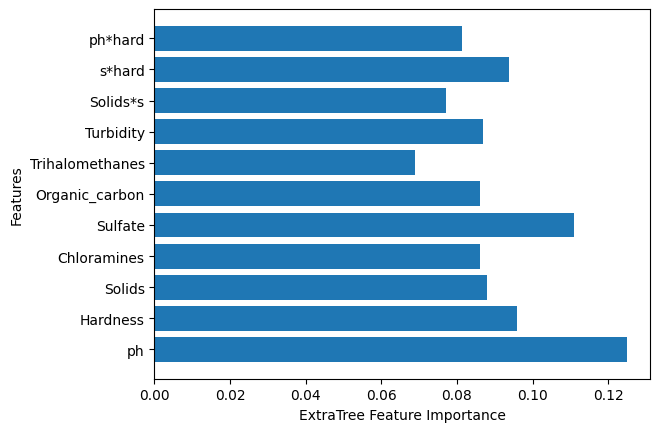

In [ ]:
#ExtraTree 特徵重要性
importances_ExtraTree0 = model_ExtraTree0.feature_importances_

plt.barh(X_train.columns, importances_ExtraTree0)
plt.xlabel('ExtraTree Feature Importance')
plt.ylabel('Features')
plt.show()

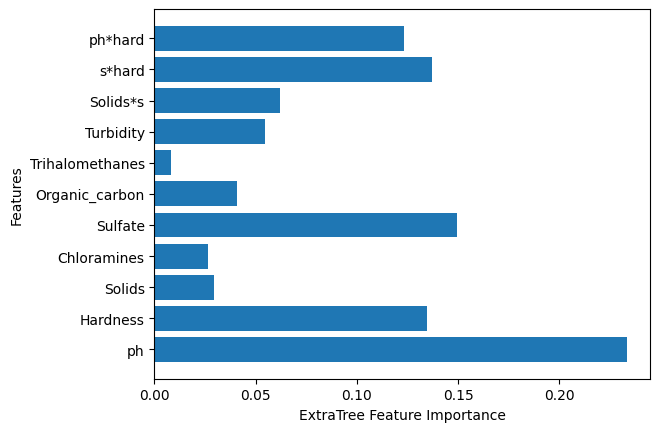

In [ ]:
importances_ExtraTree = model_ExtraTree.feature_importances_

plt.barh(X_train.columns, importances_ExtraTree)
plt.xlabel('ExtraTree Feature Importance')
plt.ylabel('Features')
plt.show()

##CatBoost

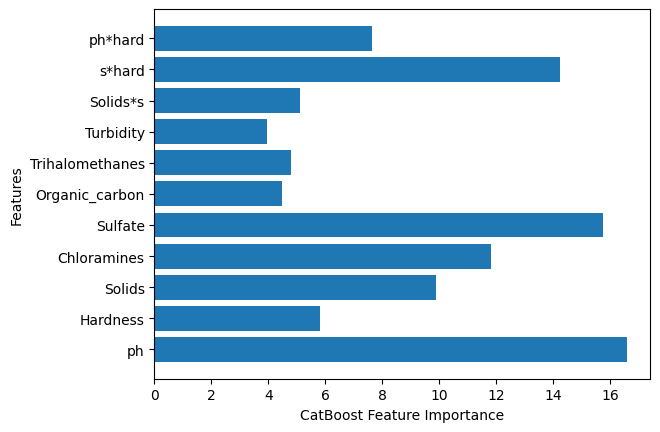

In [ ]:

# Instead of selecting the first 10, get all feature names used in training:
original_features = X_train.columns #Get all features, including interactions
importances_CatBoost0 = model_CatBoost0.feature_importances_
# Plot feature importances

plt.barh(original_features, importances_CatBoost0)
plt.xlabel('CatBoost Feature Importance')
plt.ylabel('Features')
plt.show()

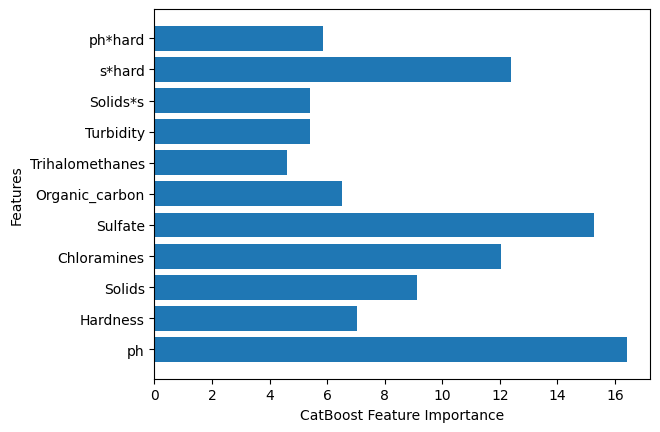

In [ ]:
importances_CatBoost = model_CatBoost.feature_importances_
# Plot feature importances

plt.barh(original_features, importances_CatBoost)
plt.xlabel('CatBoost Feature Importance')
plt.ylabel('Features')
plt.show()

#plot tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree
import matplotlib.pyplot as plt


##DecisionTree

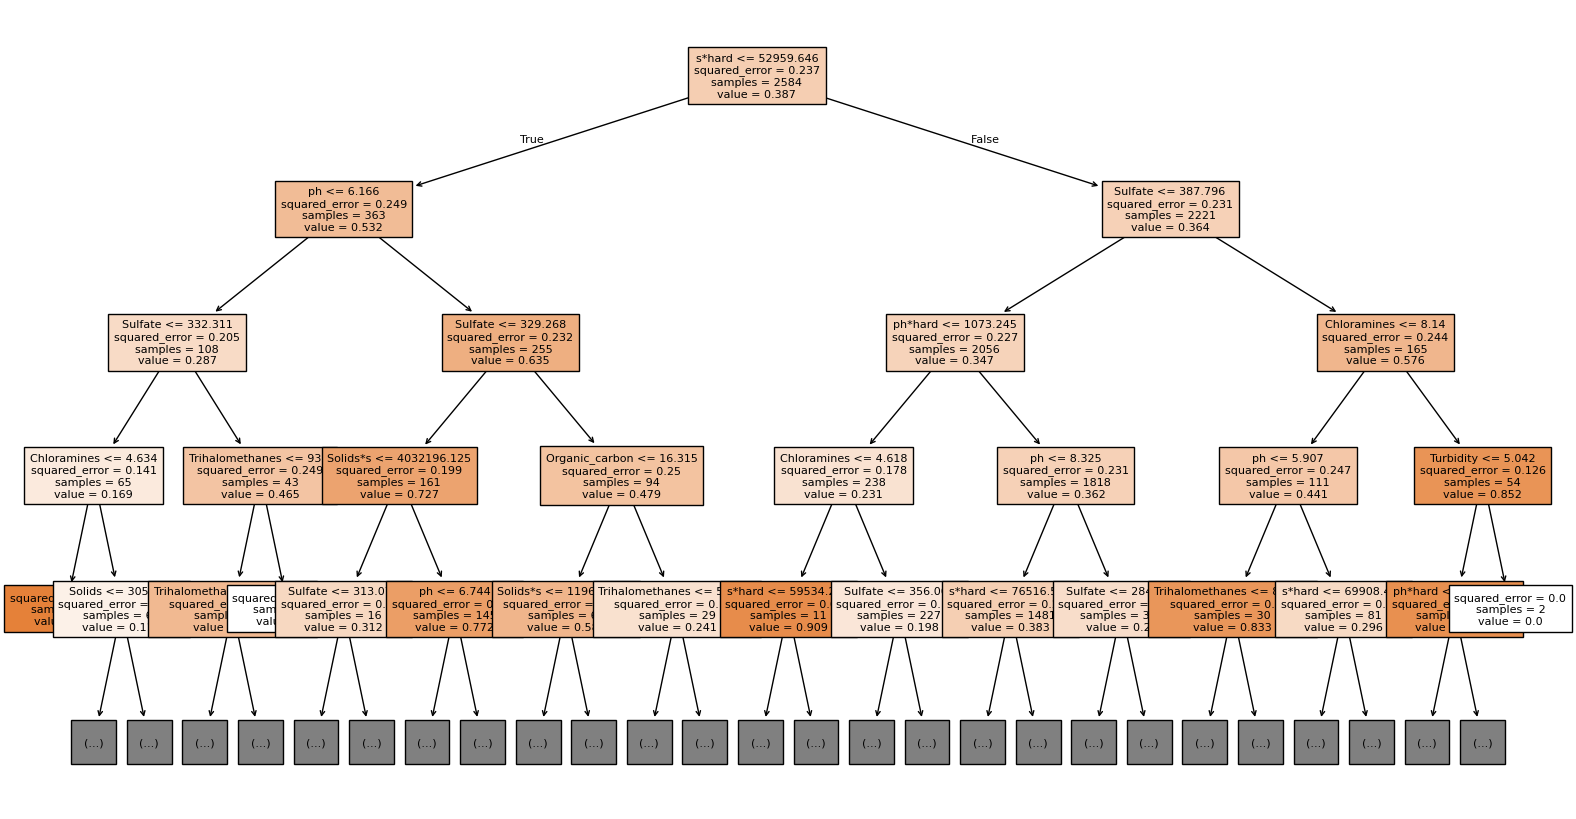

In [ ]:
#DecisionTree原始
plt.figure(figsize=(25, 20))  # 進一步增大圖像大小
plot_tree(
    model_DecisionTree0,
    feature_names=X_train.columns,
    filled=True,
    fontsize=8,  # 調整文字大小
    max_depth=4  # 限制最大深度為4，讓圖形更簡潔
)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.5)  # 調整圖像邊距
plt.show()


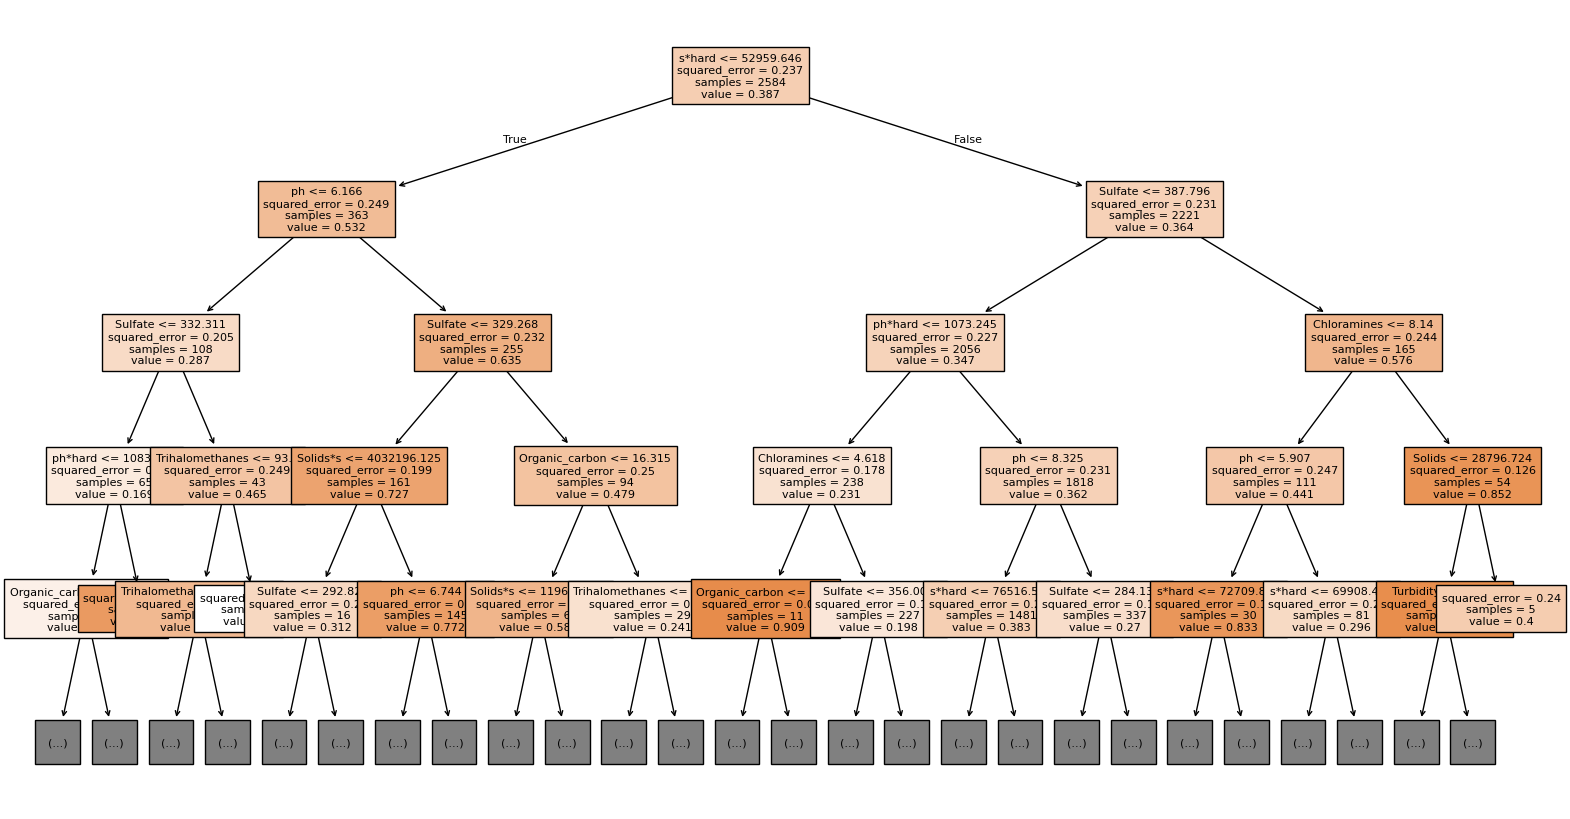

In [ ]:
#DecisionTree改過參數
plt.figure(figsize=(25, 20))  # 進一步增大圖像大小
plot_tree(
    model_DecisionTree,
    feature_names=X_train.columns,
    filled=True,
    fontsize=8,  # 調整文字大小
    max_depth=4  # 限制最大深度為4，讓圖形更簡潔
)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.5)  # 調整圖像邊距
plt.show()


##ExtraTree

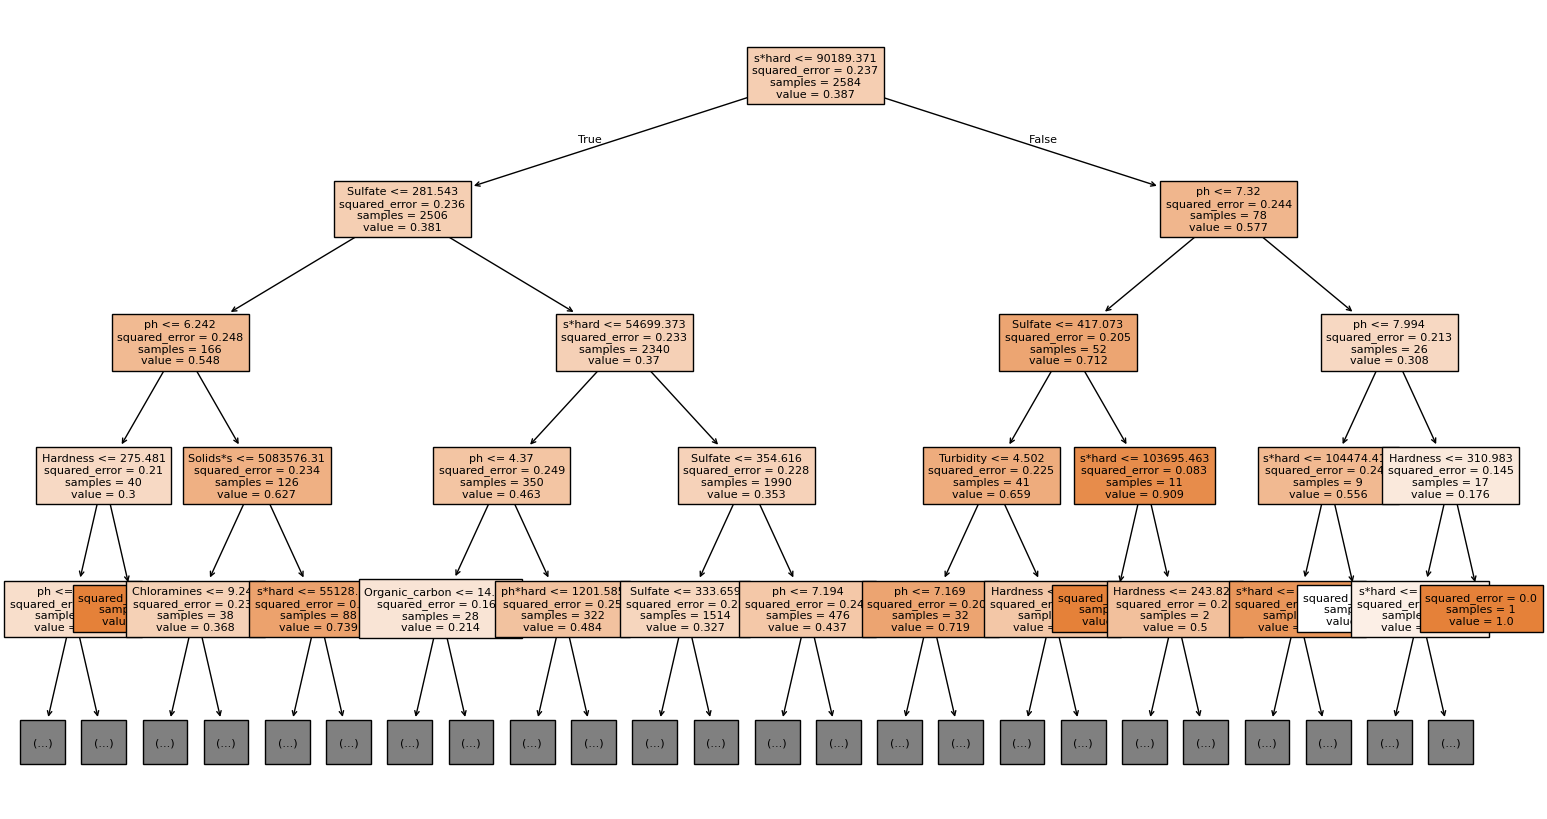

In [ ]:
#ExtraTree原始
plt.figure(figsize=(25, 20))  # 進一步增大圖像大小
plot_tree(
    model_ExtraTree0,
    feature_names=X_train.columns,
    filled=True,
    fontsize=8,  # 調整文字大小
    max_depth=4  # 限制最大深度為4，讓圖形更簡潔
)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.5)  # 調整圖像邊距
plt.show()


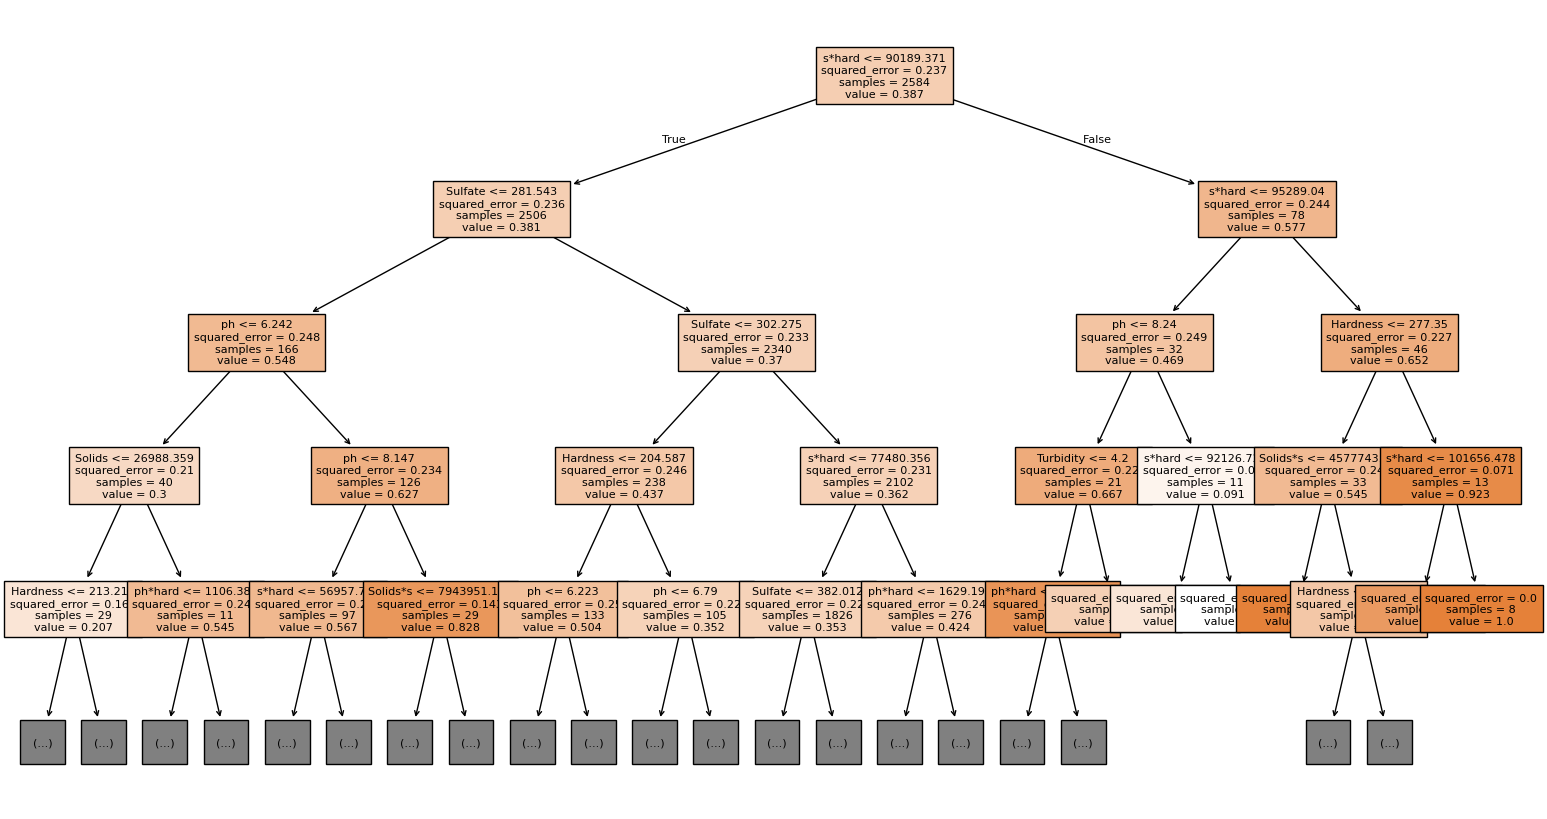

In [ ]:
#ExtraTree改過參數
plt.figure(figsize=(25, 20))  # 進一步增大圖像大小
plot_tree(
    model_ExtraTree,
    feature_names=X_train.columns,
    filled=True,
    fontsize=8,  # 調整文字大小
    max_depth=4  # 限制最大深度為4，讓圖形更簡潔
)
plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.5)  # 調整圖像邊距
plt.show()


##KNN

In [ ]:
from matplotlib.colors import ListedColormap

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


ValueError: 'red' is not a valid color value.

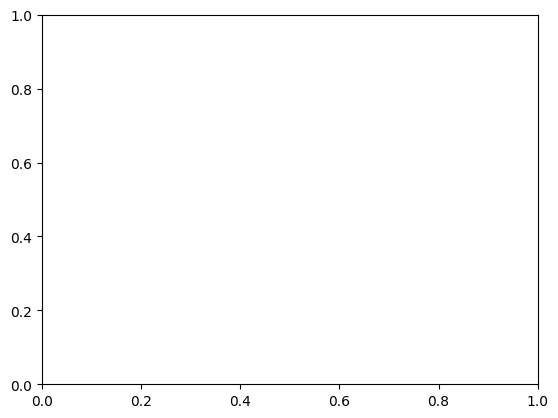

In [ ]:
# Create a DataFrame with the original features
h = .02  # 網格步長
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Reshape prediction data to match xx and yy shapes
prediction_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=[X_train.columns[0], X_train.columns[1]])
for i in range(2, len(X_train.columns)):
    prediction_data[X_train.columns[i]] = X_train[X_train.columns[i]].mean()  # Or any other appropriate method

Z = model_KN.predict(prediction_data)
Z = Z.reshape(xx.shape) # Reshape Z to 2D



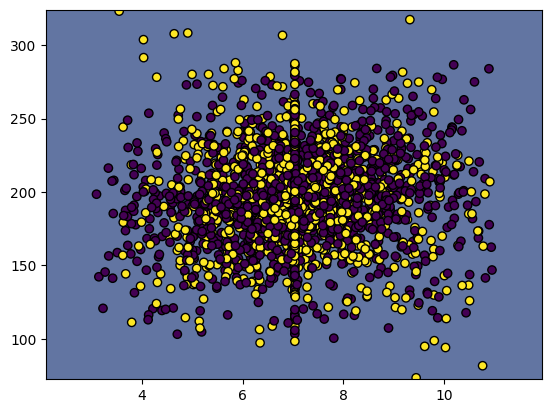

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, edgecolor='k' )
plt.show()

#SHAP

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
def RF_predict_proba(X):
    X_df = pd.DataFrame(X, columns=X_train.columns)
    return model_RandomForest.predict(X_df)
RF_prob=RF_predict_proba
explainer = shap.KernelExplainer(model=RF_prob,data=X_train[:50], link="logit", feature_names=list(X_train.columns))
shap_values = explainer.shap_values(X=X_test, nsamples=100)

  0%|          | 0/647 [00:00<?, ?it/s]

In [ ]:
# 計算 SHAP 值（DecisionTree 改過
explainer = shap.Explainer(model_DecisionTree, X_test)  # 使用模型和測試資料
shap_values = explainer(X_test)  # 計算 SHAP 值

# 繪製 SHAP Summary Plot（如你的圖）
plt.figure(figsize=(10, 7))  # 調整圖像大小
shap.summary_plot(
    shap_values.values,      # SHAP 值矩陣
    X_test,                  # 測試資料
    feature_names=X_test.columns,  # 特徵名稱
    plot_type="dot",         # 指定為散點圖（"dot"）
    color_bar=True  ,     # 顯示特徵值的顏色條
    title = "SHAP of DecisionTree"
)
plt.show()

In [ ]:
# 計算 SHAP 值（ExtraTree
explainer = shap.Explainer(model_ExtraTree, X_test)  # 使用模型和測試資料
shap_values = explainer(X_test)  # 計算 SHAP 值

# 繪製 SHAP Summary Plot（如你的圖）
plt.figure(figsize=(10, 7))  # 調整圖像大小
shap.summary_plot(
    shap_values.values,      # SHAP 值矩陣
    X_test,                  # 測試資料
    feature_names=X_test.columns,  # 特徵名稱
    plot_type="dot",         # 指定為散點圖（"dot"）
    color_bar=True   ,        # 顯示特徵值的顏色條
    title = "SHAP of ExtraTree"
)
plt.show()

In [ ]:
# 計算 SHAP 值（以 RandomForest 為例）
explainer = shap.Explainer(model_RandomForest, X_test)  # 使用模型和測試資料
shap_values = explainer(X_test)  # 計算 SHAP 值

# 繪製 SHAP Summary Plot（如你的圖）
plt.figure(figsize=(10, 7))  # 調整圖像大小
shap.summary_plot(
    shap_values.values,      # SHAP 值矩陣
    X_test,                  # 測試資料
    feature_names=X_test.columns,  # 特徵名稱
    plot_type="dot",         # 指定為散點圖（"dot"）
    color_bar=True  ,         # 顯示特徵值的顏色條
    title = "SHAP of RandomForest"
)
plt.show()


 95%|=================== | 613/647 [00:14<00:00]       

In [ ]:
# 計算 SHAP 值（CatBoost
explainer = shap.Explainer(model_CatBoost, X_test)  # 使用模型和測試資料
shap_values = explainer(X_test)  # 計算 SHAP 值

# 繪製 SHAP Summary Plot（如你的圖）
plt.figure(figsize=(10, 7))  # 調整圖像大小
shap.summary_plot(
    shap_values.values,      # SHAP 值矩陣
    X_test,                  # 測試資料
    feature_names=X_test.columns,  # 特徵名稱
    plot_type="dot",         # 指定為散點圖（"dot"）
    color_bar=True           # 顯示特徵值的顏色條
)
plt.show()

#混淆矩陣

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Convert predictions to discrete class labels (round to 0 or 1)
predictions_DecisionTree_class = predictions_DecisionTree.round()
predictions_ExtraTree_class = predictions_ExtraTree.round()
predictions_RandomForest_class = predictions_RandomForest.round()
predictions_CatBoost_class = predictions_CatBoost.round()

confusion1 = confusion_matrix(y_test, predictions_DecisionTree_class)
print("DecisionTree Confusion Matrix:")
print(confusion1)

confusion2 = confusion_matrix(y_test, predictions_ExtraTree_class)
print("ExtraTree Confusion Matrix:")
print(confusion2)

confusion3 = confusion_matrix(y_test, predictions_CatBoost_class)
print("CatBoost Confusion Matrix:")
print(confusion3)

confusion4 = confusion_matrix(y_test, predictions_RandomForest_class)
print("RandomForest Confusion Matrix:")
print(confusion4)

confusion5 = confusion_matrix(y_test, predictions_KN)
print("KNeighbors Confusion Matrix:")
print(confusion5)

DecisionTree Confusion Matrix:
[[334  47]
 [184  82]]
ExtraTree Confusion Matrix:
[[328  53]
 [192  74]]
CatBoost Confusion Matrix:
[[347  34]
 [184  82]]
RandomForest Confusion Matrix:
[[334  47]
 [191  75]]
KNeighbors Confusion Matrix:
[[308  73]
 [153 113]]


In [ ]:
cm_Decision = confusion_matrix(y_test, predictions_DecisionTree.round()) # Round the predictions to integers
cm_ext = confusion_matrix(y_test, predictions_ExtraTree.round()) # Round the predictions to integers
cm_cat = confusion_matrix(y_test, predictions_CatBoost_class)
cm_ran = confusion_matrix(y_test, predictions_RandomForest_class)
cm_KN = confusion_matrix(y_test, predictions_KN)

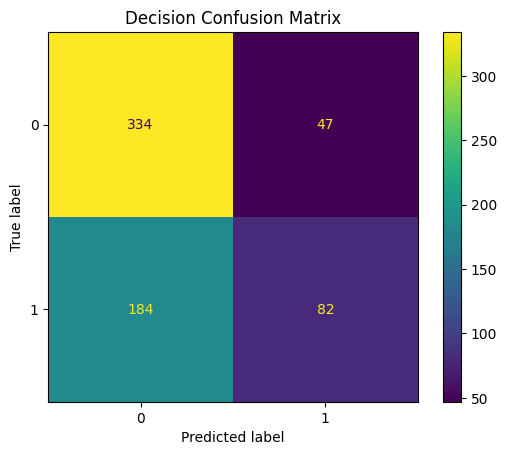

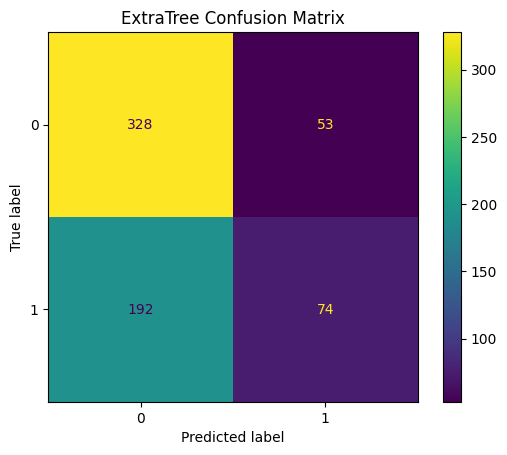

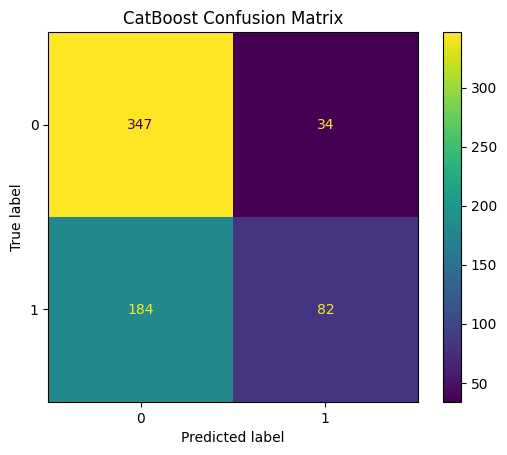

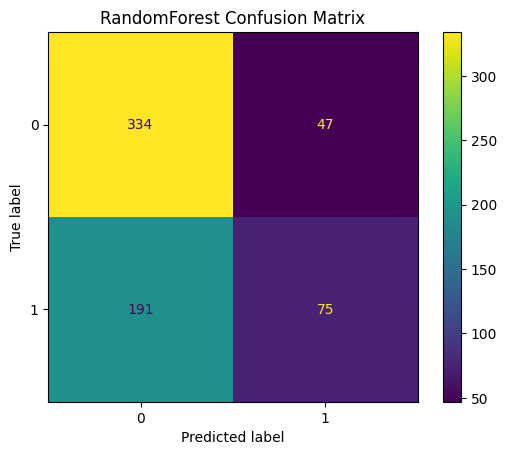

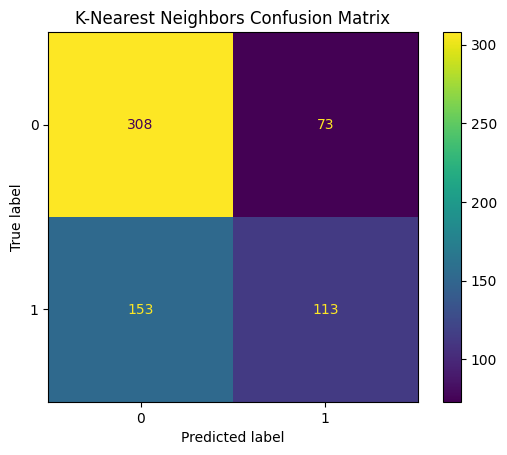

In [ ]:
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_Decision)
disp_log.plot()
plt.title('Decision Confusion Matrix')
plt.show()

disp_ran = ConfusionMatrixDisplay(confusion_matrix=cm_ext)
disp_ran.plot()
plt.title('ExtraTree Confusion Matrix')
plt.show()

disp_Decision = ConfusionMatrixDisplay(confusion_matrix=cm_cat)
disp_Decision.plot()
plt.title('CatBoost Confusion Matrix')
plt.show()

disp_KN = ConfusionMatrixDisplay(confusion_matrix=cm_ran)
disp_KN.plot()
plt.title('RandomForest Confusion Matrix')
plt.show()

disp_KN = ConfusionMatrixDisplay(confusion_matrix=cm_KN)
disp_KN.plot()
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score # Add f1_score here

##DecisionTree

In [ ]:
#DecisionTree原始
precision_DecisionTree0 = precision_score(y_test, predictions_DecisionTree0,average="binary")
recall_DecisionTree0 = recall_score(y_test, predictions_DecisionTree0,average="binary")
f1_DecisionTree0 = f1_score(y_test, predictions_DecisionTree0,average="binary")
print("DecisionTree_precision_score:",precision_DecisionTree0)
print("DecisionTree_recall_score:",recall_DecisionTree0)
print("DecisionTree_f1_score:",f1_DecisionTree0)

DecisionTree_precision_score: 0.4796747967479675
DecisionTree_recall_score: 0.44360902255639095
DecisionTree_f1_score: 0.4609375


In [ ]:
#DecisionTree改參數
precision_DecisionTree = precision_score(y_test, predictions_DecisionTree.round(), average="binary")
recall_DecisionTree = recall_score(y_test, predictions_DecisionTree.round(), average="binary")
f1_DecisionTree = f1_score(y_test, predictions_DecisionTree.round(), average="binary")
print("DecisionTree_precision_score:", precision_DecisionTree)
print("DecisionTree_recall_score:", recall_DecisionTree)
print("DecisionTree_f1_score:", f1_DecisionTree)

DecisionTree_precision_score: 0.6356589147286822
DecisionTree_recall_score: 0.3082706766917293
DecisionTree_f1_score: 0.4151898734177215


##ExtraTree

In [ ]:
#ExtraTree原始
precision_ExtraTree0 = precision_score(y_test, predictions_ExtraTree0,average="binary")
recall_ExtraTree0 = recall_score(y_test, predictions_ExtraTree0,average="binary")
f1_ExtraTree0 = f1_score(y_test, predictions_ExtraTree0,average="binary")
print("ExtraTree_precision_score:",precision_ExtraTree0)
print("ExtraTree_recall_score:",recall_ExtraTree0)
print("ExtraTree_f1_score:",f1_ExtraTree0)

ExtraTree_precision_score: 0.4523809523809524
ExtraTree_recall_score: 0.42857142857142855
ExtraTree_f1_score: 0.44015444015444016


In [ ]:
#ExtraTree改過參數
precision_ExtraTree = precision_score(y_test, predictions_ExtraTree.round(),average="binary") # Round the predictions
recall_ExtraTree = recall_score(y_test, predictions_ExtraTree.round(),average="binary") # Round the predictions
f1_ExtraTree = f1_score(y_test, predictions_ExtraTree.round(),average="binary") # Round the predictions
print("ExtraTree_precision_score:",precision_ExtraTree)
print("ExtraTree_recall_score:",recall_ExtraTree)
print("ExtraTree_f1_score:",f1_ExtraTree)

ExtraTree_precision_score: 0.5826771653543307
ExtraTree_recall_score: 0.2781954887218045
ExtraTree_f1_score: 0.37659033078880405


##CatBoost

In [ ]:
#CatBoost原始
predictions_CatBoost_class0 = predictions_CatBoost0.round()  # Round the predictions to 0 or 1
precision_CatBoost0 = precision_score(y_test, predictions_CatBoost0_class,average="binary")
recall_CatBoost0 = recall_score(y_test, predictions_CatBoost0_class,average="binary")
f1_CatBoost0 = f1_score(y_test, predictions_CatBoost0_class,average="binary")
print("CatBoost_precision_score:",precision_CatBoost0)
print("CatBoost_recall_score:",recall_CatBoost0)
print("CatBoost_f1_score:",f1_CatBoost0)

CatBoost_precision_score: 0.6692913385826772
CatBoost_recall_score: 0.31954887218045114
CatBoost_f1_score: 0.43256997455470736


In [ ]:
#CatBoost
precision_CatBoost = precision_score(y_test, predictions_CatBoost_class,average="binary")
recall_CatBoost = recall_score(y_test, predictions_CatBoost_class,average="binary")
f1_CatBoost = f1_score(y_test, predictions_CatBoost_class,average="binary")
print("CatBoost_precision_score:",precision_CatBoost)
print("CatBoost_recall_score:",recall_CatBoost)
print("CatBoost_f1_score:",f1_CatBoost)

CatBoost_precision_score: 0.7068965517241379
CatBoost_recall_score: 0.3082706766917293
CatBoost_f1_score: 0.4293193717277487


In [ ]:
#RandomForest
precision_RandomForest = precision_score(y_test, predictions_RandomForest_class,average="binary")
recall_RandomForest = recall_score(y_test, predictions_RandomForest_class,average="binary")
f1_RandomForest = f1_score(y_test, predictions_RandomForest_class,average="binary")
print("RandomForest_precision_score:",precision_RandomForest)
print("RandomForest_recall_score:",recall_RandomForest)
print("RandomForest_f1_score:",f1_RandomForest)

In [ ]:
#KNeighbors
precision_KNeighbors = precision_score(y_test, predictions_KN,average="binary")
recall_KNeighbors = recall_score(y_test, predictions_KN,average="binary")
f1_KNeighbors = f1_score(y_test, predictions_KN,average="binary")
print("KNeighbors_precision_score:",precision_KNeighbors)
print("KNeighbors_recall_score:",recall_KNeighbors)
print("KNeighbors_f1_score:",f1_KNeighbors)

In [ ]:
def calculate_metrics(cm):
    if len(cm) == 2:  # Binary classification
        TN, FP = cm[0]
        FN, TP = cm[1]
        accuracy = (TP + TN) / (TP + TN + FP + FN)
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    else:  # Multiclass (CatBoost case)
        total = sum(sum(row) for row in cm)
        TP = sum(cm[i][i] for i in range(len(cm)))  # Sum of diagonal
        accuracy = TP / total
        # Use weighted precision, recall, and F1 for multiclass
        precision = sum((cm[i][i] / sum(cm[row][i] for row in range(len(cm))) if sum(cm[row][i] for row in range(len(cm))) > 0 else 0) * sum(cm[i]) / total for i in range(len(cm)))
        recall = sum((cm[i][i] / sum(cm[i]) if sum(cm[i]) > 0 else 0) * sum(cm[i]) / total for i in range(len(cm)))
        # **Modified F1 calculation to avoid ZeroDivisionError:**
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1

In [ ]:
# Confusion matrices
conf_matrices = {
    "DecisionTree": [274, 107, 142, 124],
    "ExtraTree": [255, 126, 134, 132],
    "RandomForest": [326, 55, 164, 102],
    "KNeighbors": [306, 75, 160, 106],
}

# Function to calculate performance metrics
def calculate_metrics_from_conf_matrix(TN, FP, FN, TP):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return accuracy, precision, recall, f1

# Calculate metrics for each model
metrics_results = {}
for model, (TN, FP, FN, TP) in conf_matrices.items():
    metrics_results[model] = calculate_metrics_from_conf_matrix( TN, FP, FN, TP)

metrics_results

